In [51]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


In [52]:
plt.style.use('ggplot')
%matplotlib notebook
%matplotlib inline
doctor_data = pd.read_csv("/Users/jakebialer/Desktop/items_doctor_csv_8.csv")
doctor_info = pd.read_csv("/Users/jakebialer/Desktop/first-news-app-master/static/data.csv")
#doctor_times_friday =pd.read_csv("")
doctor_times_saturday =pd.read_csv("/Users/jakebialer/zocdoc/data2.csv")
doctor_insurance= pd.read_csv("/Users/jakebialer/zocdoc/data2.csv")

data = pd.read_csv("zocdoc/doctor_reviews.csv")
#data.to_json("doctor_reviews1.json")

In [37]:
doctor_info


Index([u'_type', u'addressLocality', u'addressRegion', u'boardCert',
       u'board_cert', u'data_icons', u'in_network_insurances', u'languages',
       u'lat', u'location_ids', u'long', u'long_name', u'name',
       u'og:description', u'og:title', u'og:type', u'page_data',
       u'page_dataconstraints', u'page_dataculture', u'page_datadate',
       u'page_datadateFormatString', u'page_datadoctorName',
       u'page_datadrawSpotlight', u'page_dataenableSpotlight',
       u'page_datagender', u'page_dataid', u'page_dataisActiveDoctor',
       u'page_dataisIE8', u'page_dataisLocked', u'page_dataisMobile',
       u'page_dataisPatientExisting', u'page_dataisUserLoggedIn',
       u'page_datalocationId', u'page_dataphotos', u'page_dataprocedureId',
       u'page_datareferrerType', u'page_datasearchUrl',
       u'page_dataselectedInsuranceByType', u'page_dataselectedSpecialty',
       u'page_dataspecialty', u'page_dataspecialtyId', u'page_datastartTime',
       u'page_datauseEnhancedInsurance

In [85]:
important_cols = doctor_data[['type','name','url','doctor_id']]
import re
ids = []
for url in doctor_data['url']:
    try:
        ids.append(re.match('.*?([0-9]+)$', url).group(1))
    except:
        ids.append("NAN")
        
doctor_data['doctor_id'] = ids
doctor_data.head()
important_cols['doctor_id']=important_cols['doctor_id'].astype(str)
doctor_info['doctor_id'] = doctor_info['doctor_id'].astype(str)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [99]:
full_data=doctor_data.merge(doctor_info, left_on="doctor_id", right_on='doctor_id', how='inner')
top_rated=full_data[full_data.overall_rating==5]
top_rated = top_rated[top_rated.total_reviews>20]

top_rated.to_csv("Top_Rated.csv")

In [15]:
data.head()
data.shape
data.apply(lambda x: x.count(), axis=0)


review_text               574285
review_author             862553
review_bedside_manner    1580755
review_date_published     811762
review_overall_rating    1608414
review_wait_time         1580755
doctor_id                1608414
dtype: int64

In [16]:
len(data['doctor_id'].unique())

33040

In [17]:
top_reviews = data[['review_overall_rating','doctor_id']].groupby(['doctor_id']).agg(['count'])['review_overall_rating']
top_reviews.sort(['count'],ascending=[0])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,count
doctor_id,
31855,3202
1172,2799
314,2797
21672,2734
12209,2518
3124,2444
21329,2380
44291,2325
407,2318


In [18]:
data[['review_bedside_manner','doctor_id']].groupby(['review_bedside_manner']).agg(len)

,doctor_id
review_bedside_manner,
1.0,17418
2.0,23377
3.0,40973
4.0,152185
5.0,1346802


In [19]:
data[['review_overall_rating','doctor_id']].groupby(['review_overall_rating']).agg(len)

,doctor_id
review_overall_rating,
1.0,28849
2.0,31031
3.0,35482
4.0,143874
5.0,1369178


In [20]:
data[['review_wait_time','doctor_id']].groupby(['review_wait_time']).agg(len)

,doctor_id
review_wait_time,
1.0,15039
2.0,43771
3.0,149819
4.0,595065
5.0,777061


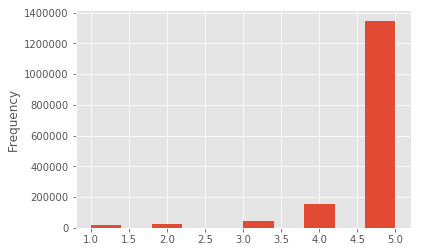

In [21]:
data['review_bedside_manner'].plot.hist()



KeyboardInterrupt: 

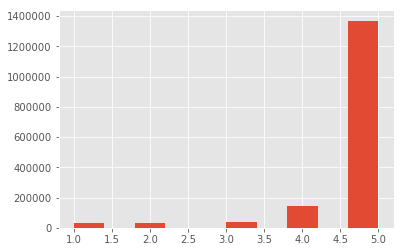

In [22]:
data['review_overall_rating'].plot.hist()

In [ ]:
data['review_wait_time'].plot.hist()

In [24]:
data.describe()
clean_data = data.dropna(axis=0,subset=['review_text'])

In [25]:
from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
# http://scikit-learn.org/stable/modules/feature_extraction.html

In [26]:
import string
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed


def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = word_tokenize(text)
    return tokens

def find_ngrams(df):
    word_vectorizer = CountVectorizer(ngram_range=(2,4), analyzer='word', stop_words='english',tokenizer=tokenize)
    sparse_matrix = word_vectorizer.fit_transform(df['review_text'])
    frequencies = sum(sparse_matrix).toarray()[0]
    return pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort('frequency',ascending=[0])

In [27]:
import pattern.en as en


five_star=clean_data[clean_data['review_overall_rating']==5.0]
five_star_sample=five_star.sample(10000)
# http://stackoverflow.com/questions/36572221/how-to-find-ngram-frequency-of-a-column-in-a-pandas-dataframe


In [28]:
top_ngrams=find_ngrams(five_star_sample)[0:20]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


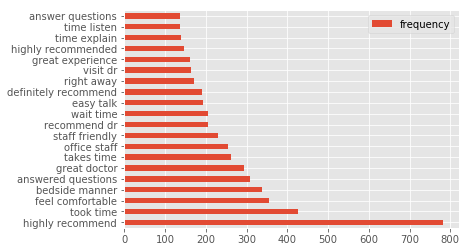

In [48]:
my_plot = top_ngrams.plot.barh()
fig = my_plot.get_figure()
fig.savefig('top_bigrams.png',dpi=300,bbox_inches='tight', pad_inches=0)


In [49]:
one_star=clean_data[clean_data['review_overall_rating']==1.0]
one_star_sample=one_star.sample(10000)


In [50]:
top_ngrams=find_ngrams(one_star_sample)[0:20]


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


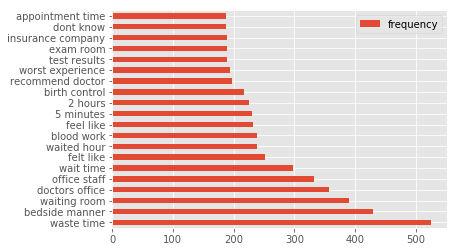

In [52]:
top_ngrams
my_plot = top_ngrams.plot.barh()
fig = my_plot.get_figure()
fig.savefig('top_onestar_bigrams.png',dpi=300,bbox_inches='tight', pad_inches=0)


In [6]:
doctor_info['city']= doctor_info['city'].astype(str)
doctor_info['state']= doctor_info['state'].astype(str)
doctor_info['city']=doctor_info['city'].apply(lambda x: x.lower())
doctor_info['state']=doctor_info['state'].apply(lambda x: x.lower())
doctor_info['city_state'] = doctor_info['city'] +", "+ doctor_info['state']
doctor_info['city_state']


0                    new york, ny
1                    new york, ny
2                    brooklyn, ny
3                    brooklyn, ny
4                    new york, ny
5                    new york, ny
6                    new york, ny
7                    new york, ny
8                    new york, ny
9                    new york, ny
10                   new york, ny
11                   new york, ny
12                   brooklyn, ny
13                   brooklyn, ny
14                   new york, ny
15                   new york, ny
16                   brooklyn, ny
17                   brooklyn, ny
18                   brooklyn, ny
19                   new york, ny
20                   brooklyn, ny
21                   new york, ny
22                   new york, ny
23                   new york, ny
24                   new york, ny
25                   new york, ny
26                   brooklyn, ny
27                   new york, ny
28                   new york, ny
29            

In [22]:
city_state_df=doctor_info[['city_state','doctor_id']]
city_state_df.drop_duplicates()
city_state_df = city_state_df.drop_duplicates()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


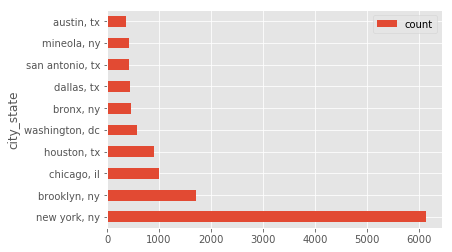

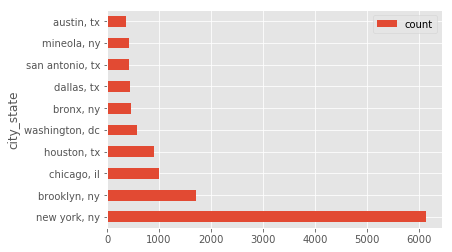

In [24]:
top_city_state=city_state_df.groupby(['city_state'])['doctor_id'].agg({"count":len}).sort(['count'],ascending=[0])
top_city_state = top_city_state[0:10]
top_city_state.plot.barh()
my_plot = top_city_state.plot.barh()
fig = my_plot.get_figure()
fig.savefig('top_city_states.png',dpi=300,bbox_inches='tight', pad_inches=0)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


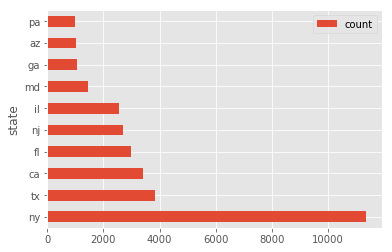

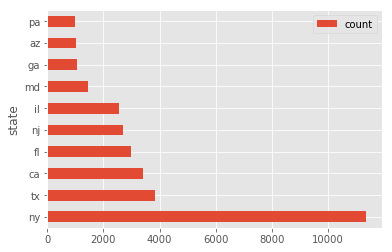

In [31]:
top_state=doctor_info[['state','doctor_id']].drop_duplicates()
top_state=top_state.groupby(['state'])['doctor_id'].agg({"count":len}).sort(['count'],ascending=[0])
top_state = top_state[0:10]
top_state.plot.barh()
my_plot = top_state.plot.barh()
fig = my_plot.get_figure()
fig.savefig('top_states.png',dpi=300,bbox_inches='tight', pad_inches=0)
top_state=doctor_info[['state','doctor_id']].drop_duplicates()


In [34]:
top_state=doctor_info[['state','doctor_id']].drop_duplicates()

top_state=top_state.groupby(['state'])['doctor_id'].agg({"count":len}).sort(['count'],ascending=[0])
top_state.apply(lambda x: 100 * x / float(x.sum()))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,count
state,
ny,28.421817
tx,9.565806
ca,8.548593
fl,7.466239
nj,6.752186
il,6.391401
md,3.655451
ga,2.673314
az,2.548042
